In [9]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [10]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [11]:
modelsfolder, resultsfolder = auxLib.folders(os.path.join('ferro', datetime.now().strftime('%Y-%m-%d')))

In [36]:
data = auxLib.SyntheticImagesGen(training=['para','ferro'], L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.8263814449310303 seconds
Generating synthetic data...
Done!
Elapsed time: 0.0338132381439209 seconds


# Training

In [37]:
for neuron in tqdm(neurons, desc=f"Generating DNN models", unit="neuron"):
    np.random.seed(seed)
    if neuron==1 or neuron==2:
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    else:   
        kernel_regularizer=tf.keras.regularizers.l2(0.01)

    dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

    dnn.build_model((L*L,), num_classes=2, layers=[
    {'type': 'dense', 'units': neuron, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
    {'type': 'dropout', 'rate': 0.2},
    {'type': 'dense', 'units': 2, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
    ])

    dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn.summary()

    dnn.fit(train_images, train_labels, 
            epochs=50, batch_size=20,
            validation_data=(test_images, test_labels), 
            callbacks=[callbacks],
            verbose=False)
    
    dnn.save_weights(f'dnn_para_ferro_n{neuron}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
    dnn.save_model(f'dnn_para_ferro_n{neuron}_DO02', directory=modelsfolder)

Generating DNN models:   0%|          | 0/33 [00:00<?, ?neuron/s]

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 1)                 1601      
                                                                 
 dropout_66 (Dropout)        (None, 1)                 0         
                                                                 
 dense_133 (Dense)           (None, 2)                 4         
                                                                 
Total params: 1605 (6.27 KB)
Trainable params: 1605 (6.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
Generating DNN models:   3%|▎         | 1/33 [01:06<35:40, 66.90s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n1_DO02.h5
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 2)                 3202      
                                                                 
 dropout_67 (Dropout)        (None, 2)                 0         
                                                                 
 dense_135 (Dense)           (None, 2)                 6         
                                                                 
Total params: 3208 (12.53 KB)
Trainable params: 3208 (12.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   6%|▌         | 2/33 [02:06<32:23, 62.69s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n2_DO02.h5
Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 3)                 4803      
                                                                 
 dropout_68 (Dropout)        (None, 3)                 0         
                                                                 
 dense_137 (Dense)           (None, 2)                 8         
                                                                 
Total params: 4811 (18.79 KB)
Trainable params: 4811 (18.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:   9%|▉         | 3/33 [02:18<19:50, 39.69s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n3_DO02.h5
Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 4)                 6404      
                                                                 
 dropout_69 (Dropout)        (None, 4)                 0         
                                                                 
 dense_139 (Dense)           (None, 2)                 10        
                                                                 
Total params: 6414 (25.05 KB)
Trainable params: 6414 (25.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  12%|█▏        | 4/33 [03:18<22:59, 47.57s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n4_DO02.h5
Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 5)                 8005      
                                                                 
 dropout_70 (Dropout)        (None, 5)                 0         
                                                                 
 dense_141 (Dense)           (None, 2)                 12        
                                                                 
Total params: 8017 (31.32 KB)
Trainable params: 8017 (31.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  15%|█▌        | 5/33 [04:16<23:54, 51.22s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n5_DO02.h5
Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 6)                 9606      
                                                                 
 dropout_71 (Dropout)        (None, 6)                 0         
                                                                 
 dense_143 (Dense)           (None, 2)                 14        
                                                                 
Total params: 9620 (37.58 KB)
Trainable params: 9620 (37.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  18%|█▊        | 6/33 [04:21<15:57, 35.47s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n6_DO02.h5
Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 7)                 11207     
                                                                 
 dropout_72 (Dropout)        (None, 7)                 0         
                                                                 
 dense_145 (Dense)           (None, 2)                 16        
                                                                 
Total params: 11223 (43.84 KB)
Trainable params: 11223 (43.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  21%|██        | 7/33 [04:40<13:00, 30.02s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n7_DO02.h5
Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 8)                 12808     
                                                                 
 dropout_73 (Dropout)        (None, 8)                 0         
                                                                 
 dense_147 (Dense)           (None, 2)                 18        
                                                                 
Total params: 12826 (50.10 KB)
Trainable params: 12826 (50.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  24%|██▍       | 8/33 [04:45<09:11, 22.07s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n8_DO02.h5
Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_148 (Dense)           (None, 9)                 14409     
                                                                 
 dropout_74 (Dropout)        (None, 9)                 0         
                                                                 
 dense_149 (Dense)           (None, 2)                 20        
                                                                 
Total params: 14429 (56.36 KB)
Trainable params: 14429 (56.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  27%|██▋       | 9/33 [04:51<06:48, 17.03s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n9_DO02.h5
Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 10)                16010     
                                                                 
 dropout_75 (Dropout)        (None, 10)                0         
                                                                 
 dense_151 (Dense)           (None, 2)                 22        
                                                                 
Total params: 16032 (62.62 KB)
Trainable params: 16032 (62.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  30%|███       | 10/33 [04:53<04:49, 12.59s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n10_DO02.h5
Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 20)                32020     
                                                                 
 dropout_76 (Dropout)        (None, 20)                0         
                                                                 
 dense_153 (Dense)           (None, 2)                 42        
                                                                 
Total params: 32062 (125.24 KB)
Trainable params: 32062 (125.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-1

Generating DNN models:  33%|███▎      | 11/33 [04:56<03:30,  9.58s/neuron]

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 40)                64040     
                                                                 
 dropout_77 (Dropout)        (None, 40)                0         
                                                                 
 dense_155 (Dense)           (None, 2)                 82        
                                                                 
Total params: 64122 (250.48 KB)
Trainable params: 64122 (250.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  36%|███▋      | 12/33 [04:59<02:39,  7.60s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n40_DO02.h5
Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 60)                96060     
                                                                 
 dropout_78 (Dropout)        (None, 60)                0         
                                                                 
 dense_157 (Dense)           (None, 2)                 122       
                                                                 
Total params: 96182 (375.71 KB)
Trainable params: 96182 (375.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  39%|███▉      | 13/33 [05:02<02:06,  6.33s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n60_DO02.h5
Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 80)                128080    
                                                                 
 dropout_79 (Dropout)        (None, 80)                0         
                                                                 
 dense_159 (Dense)           (None, 2)                 162       
                                                                 
Total params: 128242 (500.95 KB)
Trainable params: 128242 (500.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  42%|████▏     | 14/33 [05:08<01:57,  6.19s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n80_DO02.h5
Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 100)               160100    
                                                                 
 dropout_80 (Dropout)        (None, 100)               0         
                                                                 
 dense_161 (Dense)           (None, 2)                 202       
                                                                 
Total params: 160302 (626.18 KB)
Trainable params: 160302 (626.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  45%|████▌     | 15/33 [05:26<02:55,  9.75s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n100_DO02.h5
Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 150)               240150    
                                                                 
 dropout_81 (Dropout)        (None, 150)               0         
                                                                 
 dense_163 (Dense)           (None, 2)                 302       
                                                                 
Total params: 240452 (939.27 KB)
Trainable params: 240452 (939.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  48%|████▊     | 16/33 [05:31<02:18,  8.13s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n150_DO02.h5
Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 200)               320200    
                                                                 
 dropout_82 (Dropout)        (None, 200)               0         
                                                                 
 dense_165 (Dense)           (None, 2)                 402       
                                                                 
Total params: 320602 (1.22 MB)
Trainable params: 320602 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  52%|█████▏    | 17/33 [05:38<02:07,  7.97s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n200_DO02.h5
Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 250)               400250    
                                                                 
 dropout_83 (Dropout)        (None, 250)               0         
                                                                 
 dense_167 (Dense)           (None, 2)                 502       
                                                                 
Total params: 400752 (1.53 MB)
Trainable params: 400752 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  55%|█████▍    | 18/33 [05:51<02:19,  9.29s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n250_DO02.h5
Model: "sequential_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 300)               480300    
                                                                 
 dropout_84 (Dropout)        (None, 300)               0         
                                                                 
 dense_169 (Dense)           (None, 2)                 602       
                                                                 
Total params: 480902 (1.83 MB)
Trainable params: 480902 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  58%|█████▊    | 19/33 [05:58<02:04,  8.86s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n300_DO02.h5
Model: "sequential_85"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 350)               560350    
                                                                 
 dropout_85 (Dropout)        (None, 350)               0         
                                                                 
 dense_171 (Dense)           (None, 2)                 702       
                                                                 
Total params: 561052 (2.14 MB)
Trainable params: 561052 (2.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  61%|██████    | 20/33 [06:15<02:25, 11.17s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n350_DO02.h5
Model: "sequential_86"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 400)               640400    
                                                                 
 dropout_86 (Dropout)        (None, 400)               0         
                                                                 
 dense_173 (Dense)           (None, 2)                 802       
                                                                 
Total params: 641202 (2.45 MB)
Trainable params: 641202 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  64%|██████▎   | 21/33 [06:33<02:40, 13.37s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n400_DO02.h5
Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 450)               720450    
                                                                 
 dropout_87 (Dropout)        (None, 450)               0         
                                                                 
 dense_175 (Dense)           (None, 2)                 902       
                                                                 
Total params: 721352 (2.75 MB)
Trainable params: 721352 (2.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  67%|██████▋   | 22/33 [06:44<02:18, 12.62s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n450_DO02.h5
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_176 (Dense)           (None, 500)               800500    
                                                                 
 dropout_88 (Dropout)        (None, 500)               0         
                                                                 
 dense_177 (Dense)           (None, 2)                 1002      
                                                                 
Total params: 801502 (3.06 MB)
Trainable params: 801502 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  70%|██████▉   | 23/33 [06:57<02:06, 12.68s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n500_DO02.h5
Model: "sequential_89"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 550)               880550    
                                                                 
 dropout_89 (Dropout)        (None, 550)               0         
                                                                 
 dense_179 (Dense)           (None, 2)                 1102      
                                                                 
Total params: 881652 (3.36 MB)
Trainable params: 881652 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  73%|███████▎  | 24/33 [07:23<02:30, 16.73s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n550_DO02.h5
Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 600)               960600    
                                                                 
 dropout_90 (Dropout)        (None, 600)               0         
                                                                 
 dense_181 (Dense)           (None, 2)                 1202      
                                                                 
Total params: 961802 (3.67 MB)
Trainable params: 961802 (3.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  76%|███████▌  | 25/33 [07:51<02:40, 20.03s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n600_DO02.h5
Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_182 (Dense)           (None, 650)               1040650   
                                                                 
 dropout_91 (Dropout)        (None, 650)               0         
                                                                 
 dense_183 (Dense)           (None, 2)                 1302      
                                                                 
Total params: 1041952 (3.97 MB)
Trainable params: 1041952 (3.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  79%|███████▉  | 26/33 [08:06<02:10, 18.58s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n650_DO02.h5
Model: "sequential_92"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 700)               1120700   
                                                                 
 dropout_92 (Dropout)        (None, 700)               0         
                                                                 
 dense_185 (Dense)           (None, 2)                 1402      
                                                                 
Total params: 1122102 (4.28 MB)
Trainable params: 1122102 (4.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  82%|████████▏ | 27/33 [08:37<02:13, 22.18s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n700_DO02.h5
Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 750)               1200750   
                                                                 
 dropout_93 (Dropout)        (None, 750)               0         
                                                                 
 dense_187 (Dense)           (None, 2)                 1502      
                                                                 
Total params: 1202252 (4.59 MB)
Trainable params: 1202252 (4.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  85%|████████▍ | 28/33 [08:54<01:43, 20.68s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n750_DO02.h5
Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 800)               1280800   
                                                                 
 dropout_94 (Dropout)        (None, 800)               0         
                                                                 
 dense_189 (Dense)           (None, 2)                 1602      
                                                                 
Total params: 1282402 (4.89 MB)
Trainable params: 1282402 (4.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  88%|████████▊ | 29/33 [09:30<01:40, 25.16s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n800_DO02.h5
Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 850)               1360850   
                                                                 
 dropout_95 (Dropout)        (None, 850)               0         
                                                                 
 dense_191 (Dense)           (None, 2)                 1702      
                                                                 
Total params: 1362552 (5.20 MB)
Trainable params: 1362552 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  91%|█████████ | 30/33 [10:07<01:26, 28.76s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n850_DO02.h5
Model: "sequential_96"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_192 (Dense)           (None, 900)               1440900   
                                                                 
 dropout_96 (Dropout)        (None, 900)               0         
                                                                 
 dense_193 (Dense)           (None, 2)                 1802      
                                                                 
Total params: 1442702 (5.50 MB)
Trainable params: 1442702 (5.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models:  94%|█████████▍| 31/33 [10:27<00:52, 26.09s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n900_DO02.h5
Model: "sequential_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_194 (Dense)           (None, 950)               1520950   
                                                                 
 dropout_97 (Dropout)        (None, 950)               0         
                                                                 
 dense_195 (Dense)           (None, 2)                 1902      
                                                                 
Total params: 1522852 (5.81 MB)
Trainable params: 1522852 (5.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!


Generating DNN models:  97%|█████████▋| 32/33 [11:08<00:30, 30.70s/neuron]

Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n950_DO02.h5
Model: "sequential_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 1000)              1601000   
                                                                 
 dropout_98 (Dropout)        (None, 1000)              0         
                                                                 
 dense_197 (Dense)           (None, 2)                 2002      
                                                                 
Total params: 1603002 (6.11 MB)
Trainable params: 1603002 (6.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Generating DNN models: 100%|██████████| 33/33 [11:30<00:00, 20.93s/neuron]


Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\models\ferro\2024-08-18\dnn_para_ferro_n1000_DO02.h5


# Predictions

In [38]:
# Initializing loader and saver

loader_init = auxLib.loader_and_saver(os.getcwd())

# Loading simulated images

sim_images, temperature = loader_init.simulatedImages(-1)

Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:06<00:00, 22.81array/s]


Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:18<00:00,  8.55repetitions/s]


Prediction for 1 neurons in hidden layer
T_c = 2.344930011240927


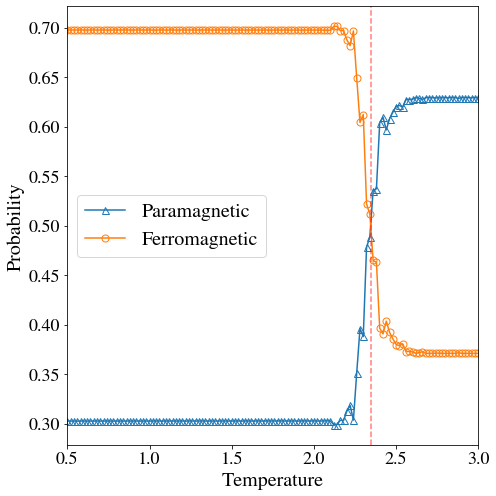

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.68repetitions/s]


Prediction for 2 neurons in hidden layer
T_c = 2.3146829608794


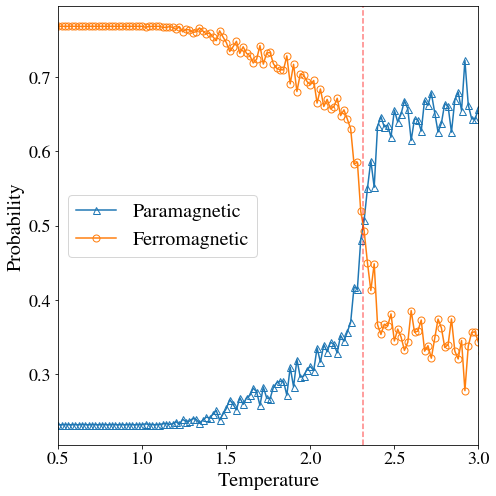

Predicting: 100%|██████████| 155/155 [00:15<00:00, 10.23repetitions/s]


Prediction for 3 neurons in hidden layer
T_c = 2.3559630899711563


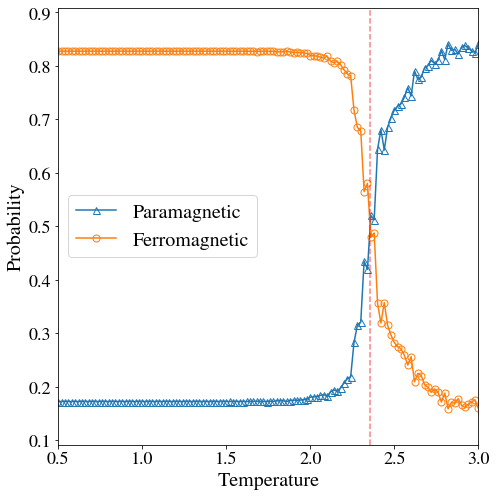

Predicting: 100%|██████████| 155/155 [00:15<00:00,  9.78repetitions/s]


Prediction for 4 neurons in hidden layer
T_c = 2.319392084725552


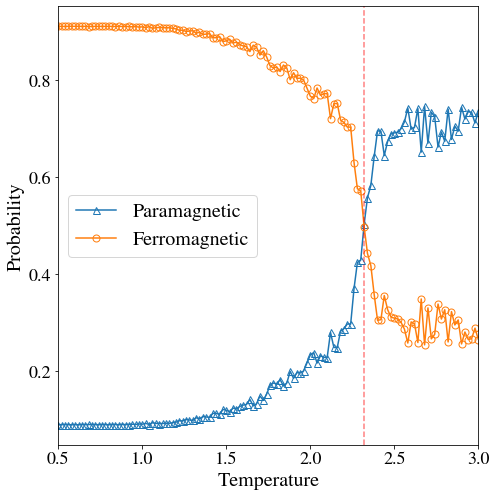

Predicting: 100%|██████████| 155/155 [00:15<00:00,  9.74repetitions/s]


Prediction for 5 neurons in hidden layer
T_c = 2.278724579978811


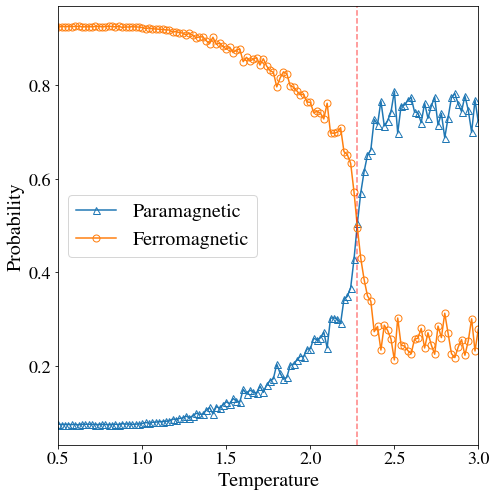

Predicting: 100%|██████████| 155/155 [00:19<00:00,  7.98repetitions/s]


Prediction for 6 neurons in hidden layer
T_c = 2.3468222692409415


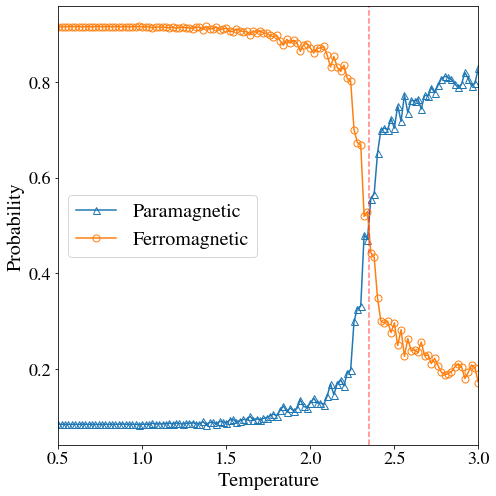

Predicting: 100%|██████████| 155/155 [00:15<00:00, 10.16repetitions/s]


Prediction for 7 neurons in hidden layer
T_c = 2.3838830610151853


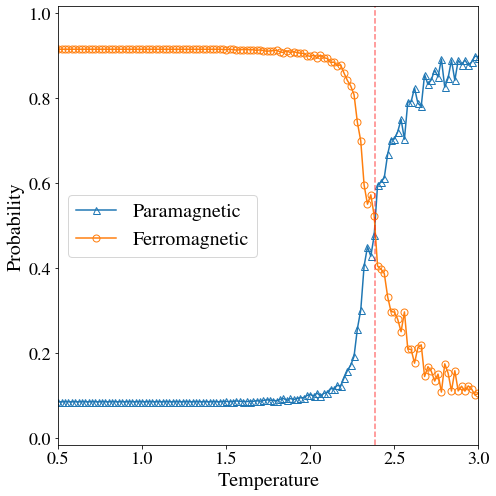

Predicting: 100%|██████████| 155/155 [00:23<00:00,  6.64repetitions/s]


Prediction for 8 neurons in hidden layer
T_c = 2.3979490523800178


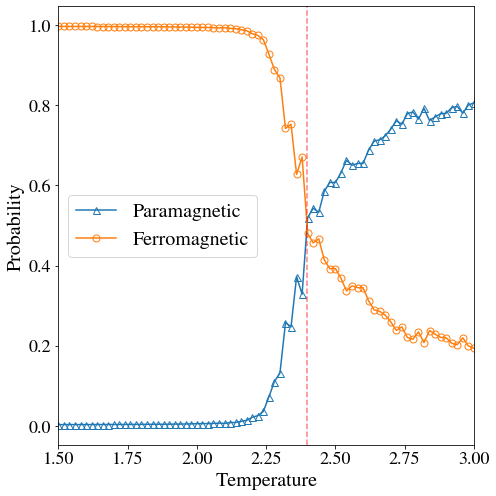

Predicting: 100%|██████████| 155/155 [00:25<00:00,  5.97repetitions/s]


Prediction for 9 neurons in hidden layer
T_c = 2.444948560745461


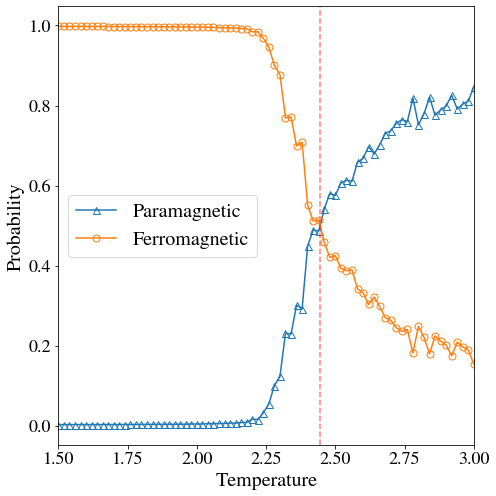

Predicting: 100%|██████████| 155/155 [00:14<00:00, 10.59repetitions/s]


Prediction for 10 neurons in hidden layer
T_c = 2.3904157215661312


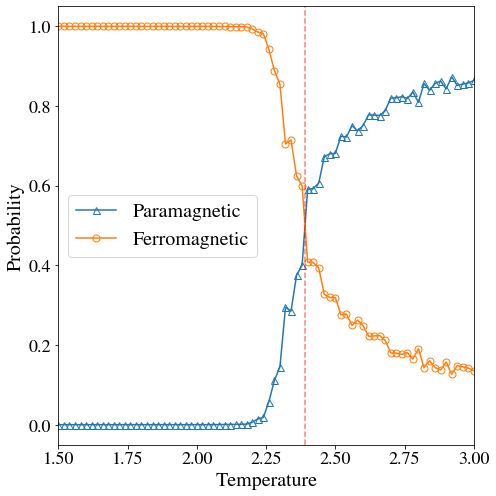

Predicting: 100%|██████████| 155/155 [00:17<00:00,  9.06repetitions/s]


Prediction for 20 neurons in hidden layer
T_c = 2.3857772176494767


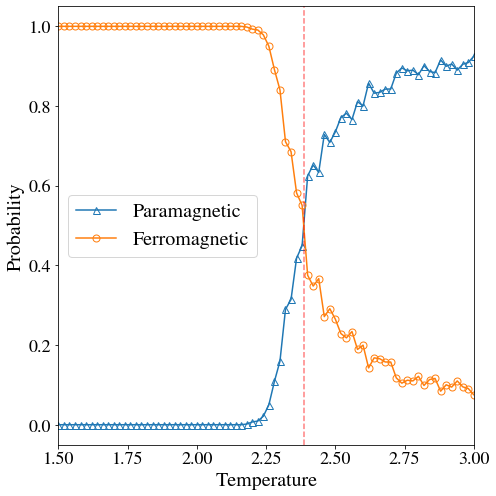

Predicting: 100%|██████████| 155/155 [00:39<00:00,  3.88repetitions/s]


Prediction for 40 neurons in hidden layer
T_c = 2.652267869222097


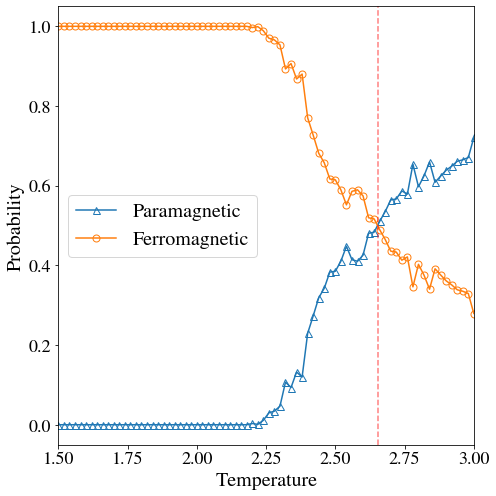

Predicting: 100%|██████████| 155/155 [00:37<00:00,  4.13repetitions/s]


Prediction for 60 neurons in hidden layer
T_c = 2.4444776622427224


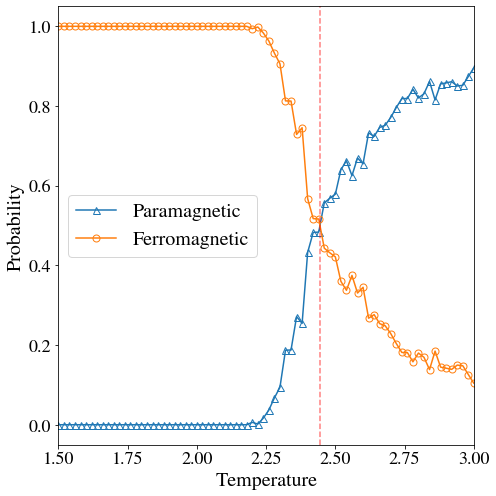

Predicting: 100%|██████████| 155/155 [00:33<00:00,  4.63repetitions/s]


Prediction for 80 neurons in hidden layer
T_c = 2.4018473417276205


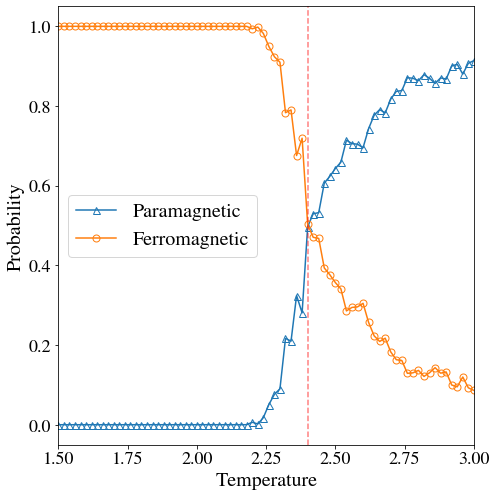

Predicting: 100%|██████████| 155/155 [00:32<00:00,  4.73repetitions/s]


Prediction for 100 neurons in hidden layer
T_c = 2.348693173398202


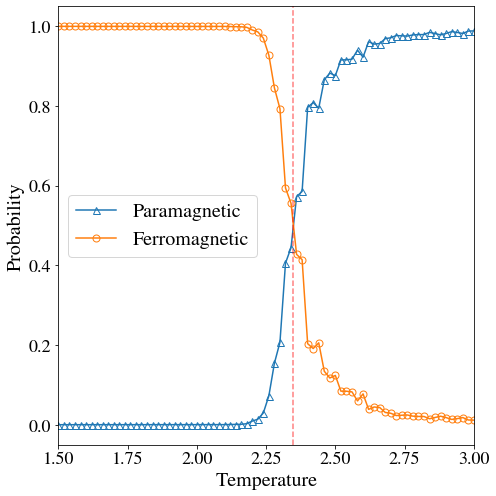

Predicting: 100%|██████████| 155/155 [00:28<00:00,  5.46repetitions/s]


Prediction for 150 neurons in hidden layer
T_c = 2.3548866988610975


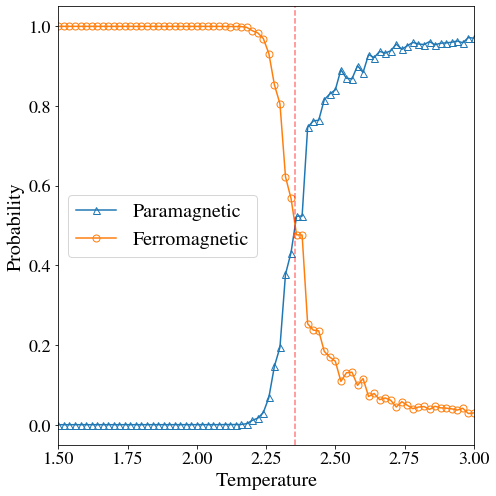

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.57repetitions/s]


Prediction for 200 neurons in hidden layer
T_c = 2.3594690816907136


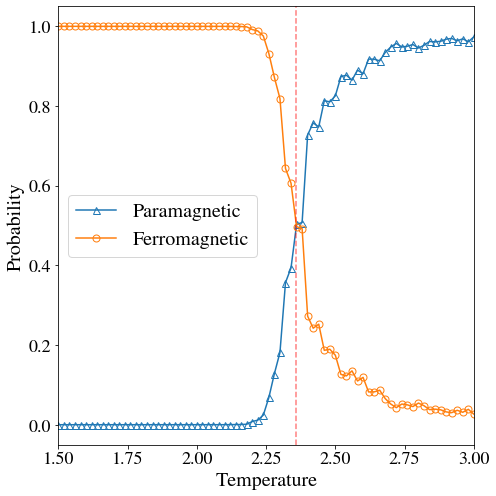

Predicting: 100%|██████████| 155/155 [00:24<00:00,  6.27repetitions/s]


Prediction for 250 neurons in hidden layer
T_c = 2.3145813750686117


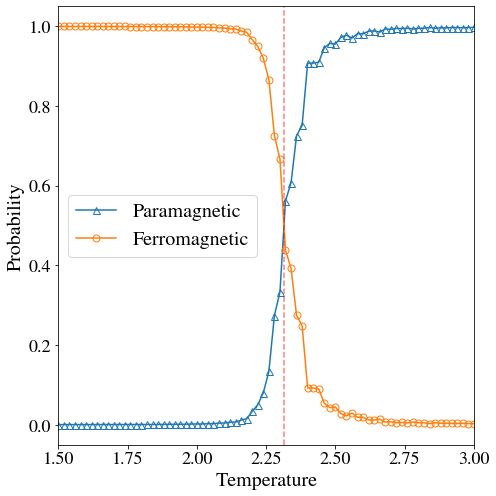

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.54repetitions/s]


Prediction for 300 neurons in hidden layer
T_c = 2.337246382984765


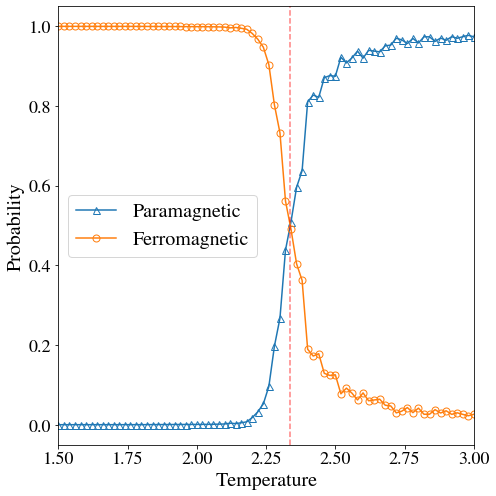

Predicting: 100%|██████████| 155/155 [00:25<00:00,  6.01repetitions/s]


Prediction for 350 neurons in hidden layer
T_c = 2.3554538383258206


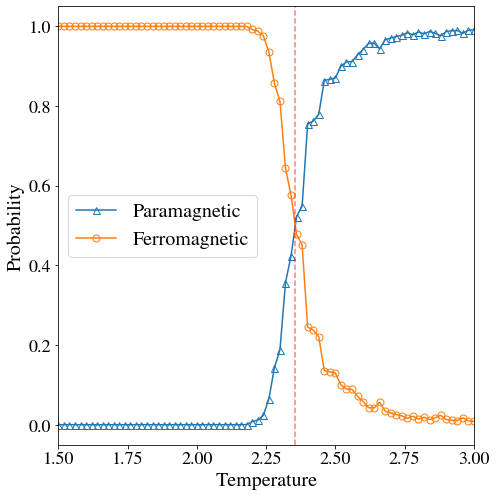

Predicting: 100%|██████████| 155/155 [00:40<00:00,  3.87repetitions/s]


Prediction for 400 neurons in hidden layer
T_c = 2.314266496373555


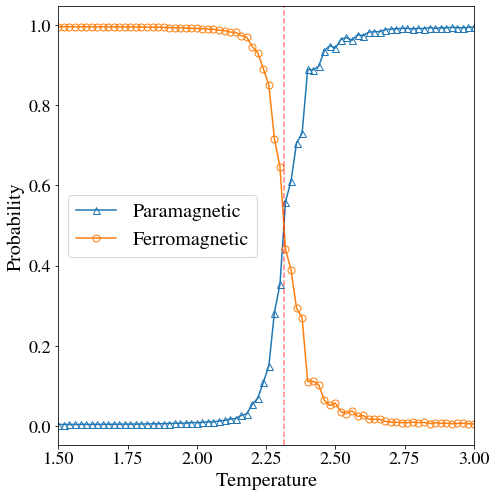

Predicting: 100%|██████████| 155/155 [00:36<00:00,  4.24repetitions/s]


Prediction for 450 neurons in hidden layer
T_c = 2.3938249805114933


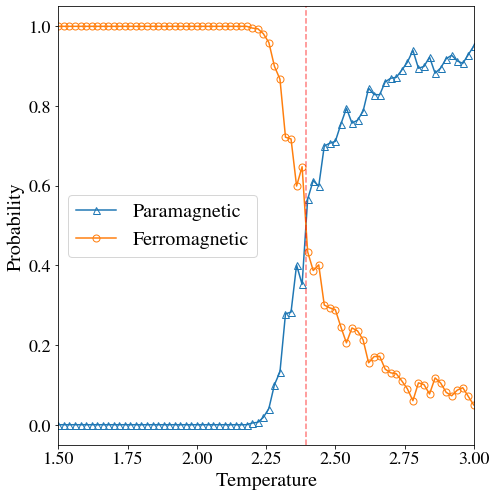

Predicting: 100%|██████████| 155/155 [00:28<00:00,  5.46repetitions/s]


Prediction for 500 neurons in hidden layer
T_c = 2.350696502659679


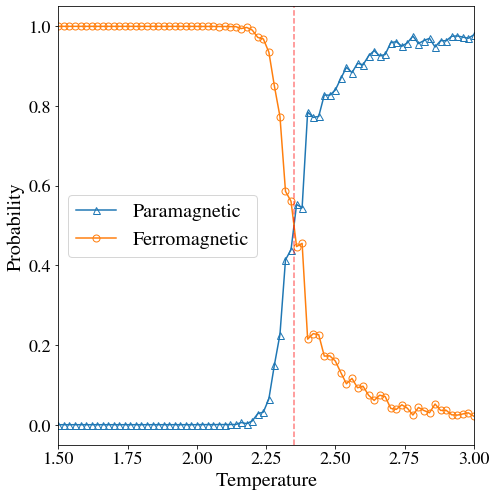

Predicting: 100%|██████████| 155/155 [00:30<00:00,  5.04repetitions/s]


Prediction for 550 neurons in hidden layer
T_c = 2.3186353575441796


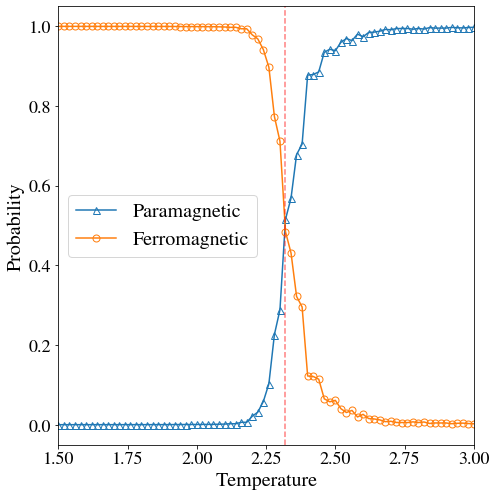

Predicting: 100%|██████████| 155/155 [00:27<00:00,  5.55repetitions/s]


Prediction for 600 neurons in hidden layer
T_c = 2.309302857133854


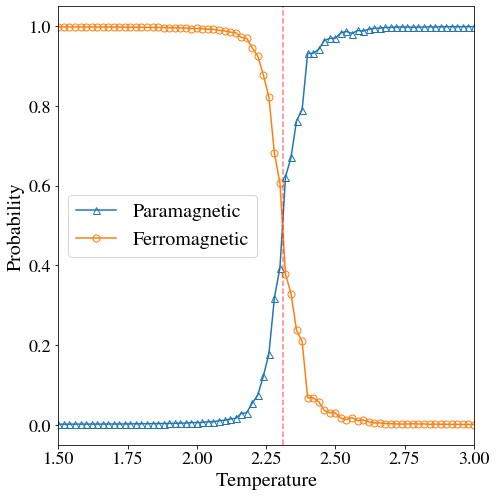

Predicting: 100%|██████████| 155/155 [00:39<00:00,  3.94repetitions/s]


Prediction for 650 neurons in hidden layer
T_c = 2.3121477215769795


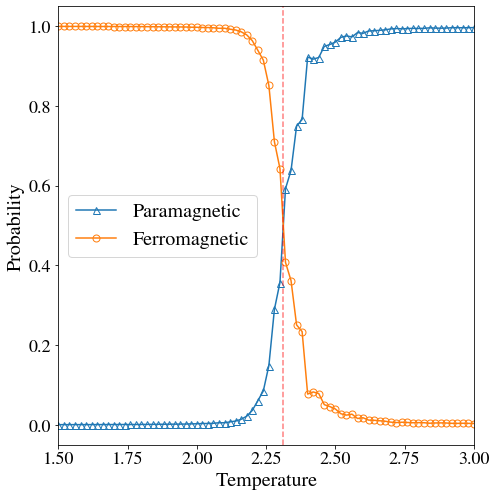

Predicting: 100%|██████████| 155/155 [00:29<00:00,  5.30repetitions/s]


Prediction for 700 neurons in hidden layer
T_c = 2.315672443659049


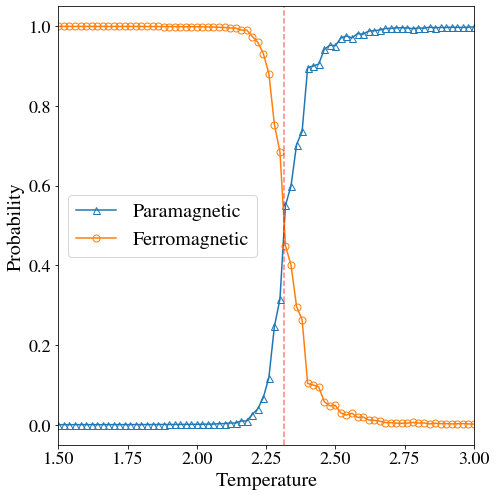

Predicting: 100%|██████████| 155/155 [00:29<00:00,  5.20repetitions/s]


Prediction for 750 neurons in hidden layer
T_c = 2.3439849780756306


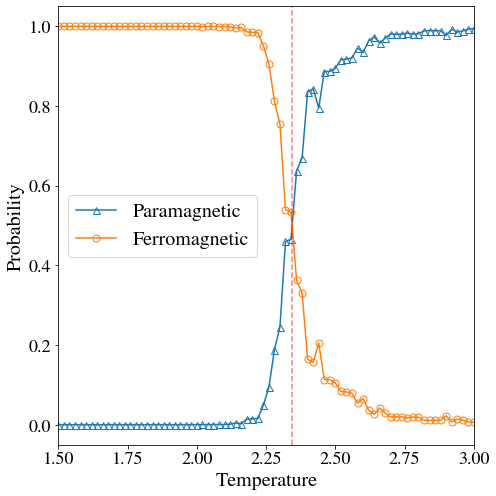

Predicting: 100%|██████████| 155/155 [00:29<00:00,  5.24repetitions/s]


Prediction for 800 neurons in hidden layer
T_c = 2.316361159013329


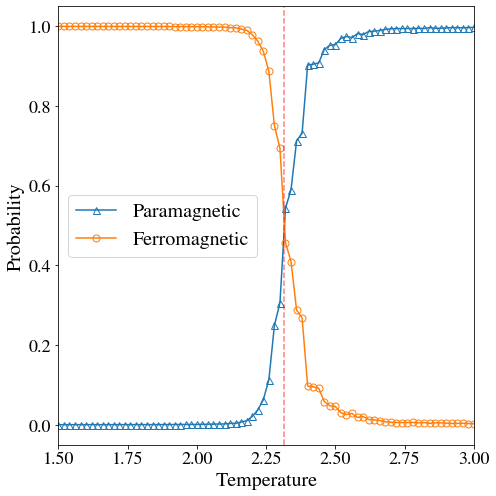

Predicting: 100%|██████████| 155/155 [00:55<00:00,  2.80repetitions/s]


Prediction for 850 neurons in hidden layer
T_c = 2.3173081463833998


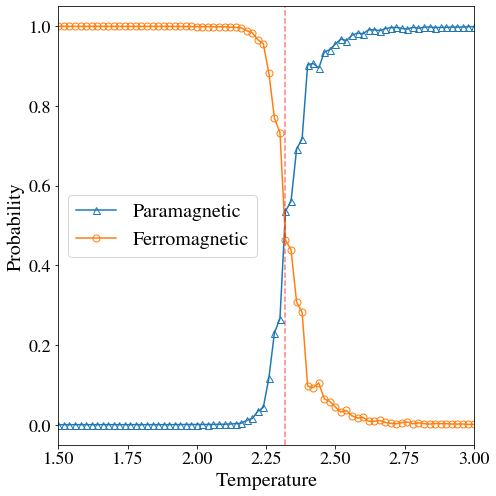

Predicting: 100%|██████████| 155/155 [00:55<00:00,  2.80repetitions/s]


Prediction for 900 neurons in hidden layer
T_c = 2.3183393275147264


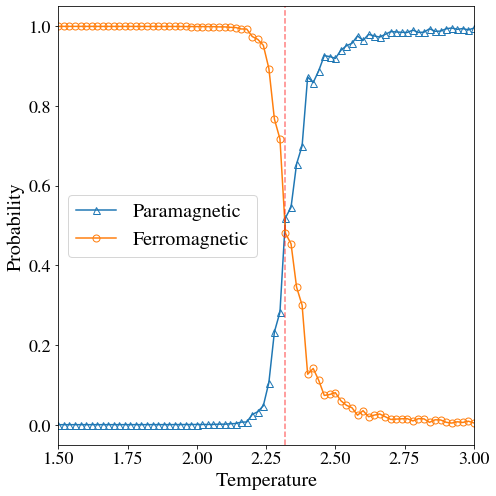

Predicting: 100%|██████████| 155/155 [00:37<00:00,  4.19repetitions/s]


Prediction for 950 neurons in hidden layer
T_c = 2.3072044408214487


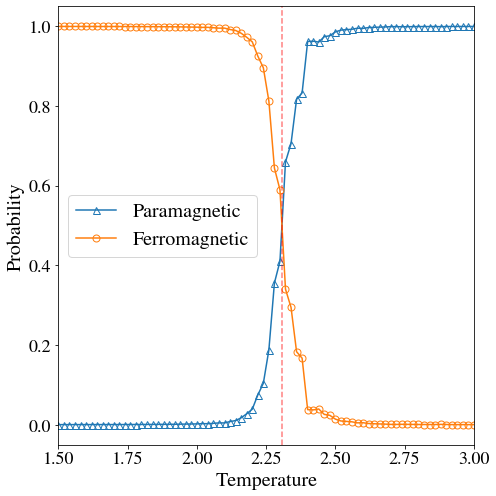

Predicting: 100%|██████████| 155/155 [00:29<00:00,  5.31repetitions/s]


Prediction for 1000 neurons in hidden layer
T_c = 2.348852660228437


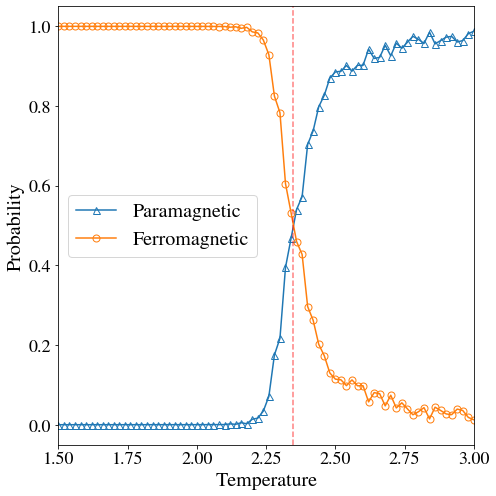

In [39]:
critical_temperatures = []

for neuron in neurons:
    index = neurons.index(neuron)

    model_path = os.path.join(modelsfolder, f'dnn_para_ferro_n{neuron}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, neuron,
								training=['para', 'ferro'],
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)

    para, ferro = prediction.T

    print(f'Prediction for {neuron} neurons in hidden layer')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    
    if neuron<8:
        plt.xlim((0.5, 3))
    else:
        plt.xlim((1.5, 3))
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'{neuron}neurons.pdf'))
    plt.show()

In [40]:
temp = pd.DataFrame((np.concatenate((np.array(neurons).reshape(len(neurons),1), 
                                    np.array(critical_temperatures).reshape(len(neurons),1)),axis=1)), 
                                    columns=['Neurons','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures.csv'), index=False)

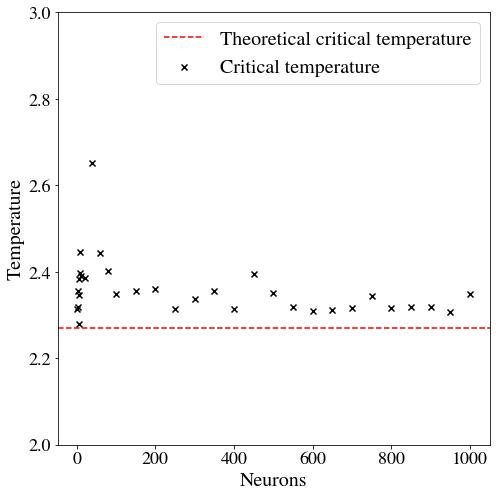

In [8]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Neurons'][1:],temp['Temperature'][1:], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel('Neurons')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.ylim((2, 3))
plt.legend(loc='upper right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures.pdf'))
plt.show()

# Half of height criteria

In [15]:
from scipy.optimize import curve_fit

In [26]:
saving_folder = os.path.join(os.getcwd(), 'predictions', 'Half_of_height', datetime.now().strftime('%Y-%m-%d'), 'training_ferro')

os.makedirs(saving_folder, exist_ok = True)

In [16]:
def constant_func(x, b):
    return np.full_like(x, b)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

Prediction for 1 neurons in hidden layer
Lower bound (Paramagnetic): 0.30248551011085506
Higher bound (Paramagnetic): 0.6291118860244751
Half of height (Paramagnetic): 0.46579869806766505
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.6975140929222107
Higher bound (Ferromagnetic): 0.3708881139755249
Half of height (Ferromagnetic): 0.5342011034488678
Critical temperature (Ferromagnetic): 2.32


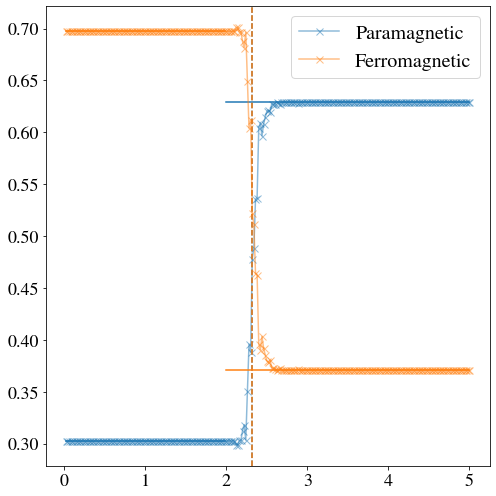

Prediction for 2 neurons in hidden layer
Lower bound (Paramagnetic): 0.23204453349113463
Higher bound (Paramagnetic): 0.6548419477885328
Half of height (Paramagnetic): 0.4434432406398337
Critical temperature (Paramagnetic): 2.26
Lower bound (Ferromagnetic): 0.7679553699488344
Higher bound (Ferromagnetic): 0.3451584402238361
Half of height (Ferromagnetic): 0.5565569050863353
Critical temperature (Ferromagnetic): 2.26


<Figure size 432x288 with 0 Axes>

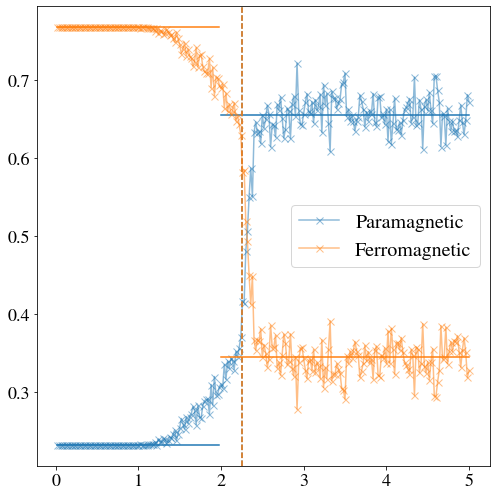

Prediction for 3 neurons in hidden layer
Lower bound (Paramagnetic): 0.17248943656682966
Higher bound (Paramagnetic): 0.8553499532680885
Half of height (Paramagnetic): 0.513919694917459
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.827509640455246
Higher bound (Ferromagnetic): 0.14465005929376995
Half of height (Ferromagnetic): 0.486079849874508
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

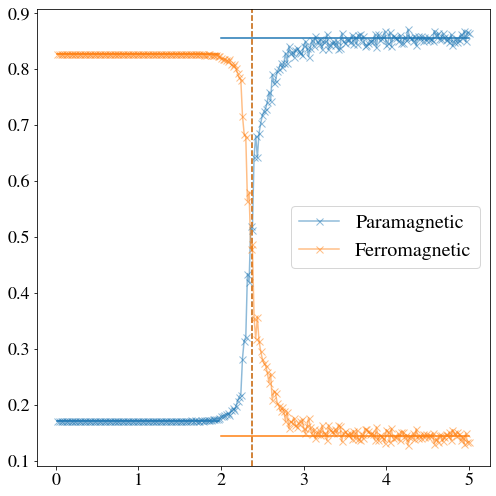

Prediction for 4 neurons in hidden layer
Lower bound (Paramagnetic): 0.08980516508221621
Higher bound (Paramagnetic): 0.7191697768130442
Half of height (Paramagnetic): 0.4044874709476302
Critical temperature (Paramagnetic): 2.28
Lower bound (Ferromagnetic): 0.9101944613456726
Higher bound (Ferromagnetic): 0.28083021704900235
Half of height (Ferromagnetic): 0.5955123391973375
Critical temperature (Ferromagnetic): 2.28


<Figure size 432x288 with 0 Axes>

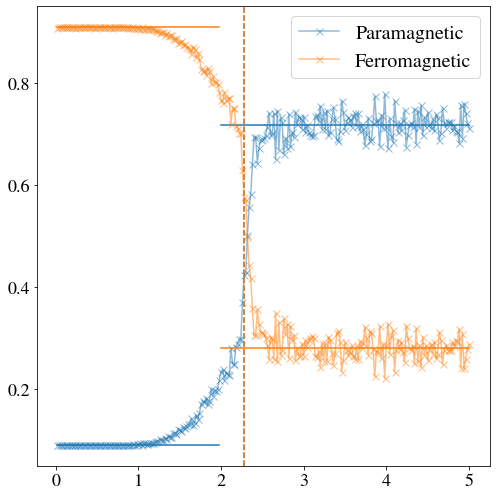

Prediction for 5 neurons in hidden layer
Lower bound (Paramagnetic): 0.07519100725449057
Higher bound (Paramagnetic): 0.7516968881377245
Half of height (Paramagnetic): 0.41344394769610754
Critical temperature (Paramagnetic): 2.26
Lower bound (Ferromagnetic): 0.9248090696333199
Higher bound (Ferromagnetic): 0.24830309287005775
Half of height (Ferromagnetic): 0.5865560812516888
Critical temperature (Ferromagnetic): 2.26


<Figure size 432x288 with 0 Axes>

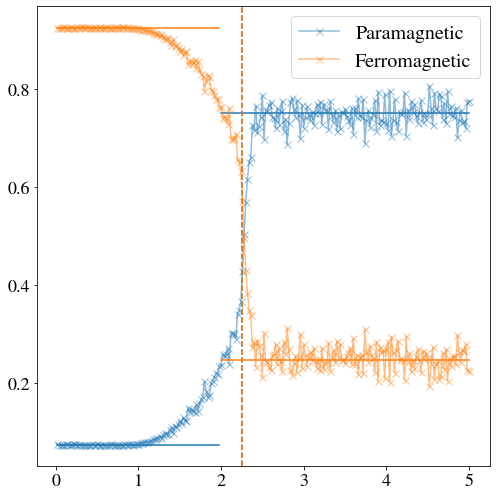

Prediction for 6 neurons in hidden layer
Lower bound (Paramagnetic): 0.08479059919515275
Higher bound (Paramagnetic): 0.8311396977477037
Half of height (Paramagnetic): 0.4579651484714282
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.915209311246687
Higher bound (Ferromagnetic): 0.1688603376038501
Half of height (Ferromagnetic): 0.5420348244252686
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

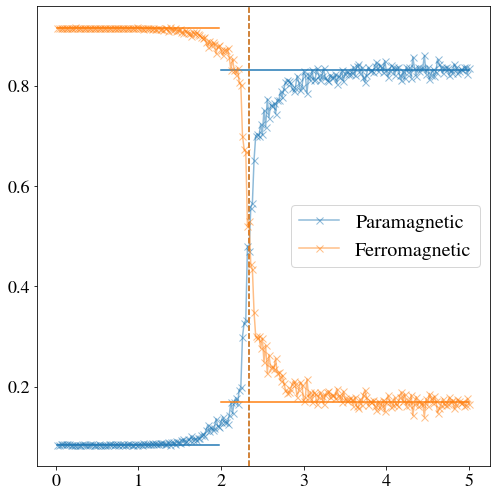

Prediction for 7 neurons in hidden layer
Lower bound (Paramagnetic): 0.0854833349585533
Higher bound (Paramagnetic): 0.9542829300842036
Half of height (Paramagnetic): 0.5198831325213784
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9145156741142272
Higher bound (Ferromagnetic): 0.04571706465438152
Half of height (Ferromagnetic): 0.48011636938430435
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

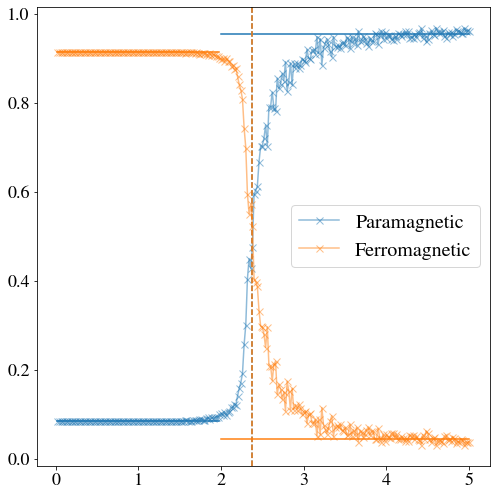

Prediction for 8 neurons in hidden layer
Lower bound (Paramagnetic): 0.002616010354831762
Higher bound (Paramagnetic): 0.8571777916418961
Half of height (Paramagnetic): 0.4298969009983639
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9973841035366001
Higher bound (Ferromagnetic): 0.14282220952464086
Half of height (Ferromagnetic): 0.5701031565306205
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

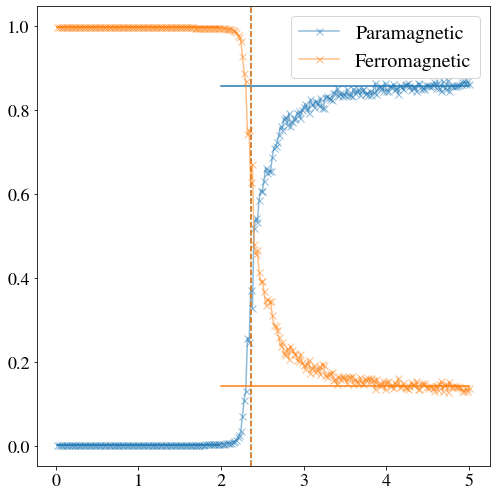

Prediction for 9 neurons in hidden layer
Lower bound (Paramagnetic): 0.00206124462187285
Higher bound (Paramagnetic): 0.9096601920967375
Half of height (Paramagnetic): 0.4558607183593052
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9979392266273454
Higher bound (Ferromagnetic): 0.09033979139293213
Half of height (Ferromagnetic): 0.5441395090101387
Critical temperature (Ferromagnetic): 2.4


<Figure size 432x288 with 0 Axes>

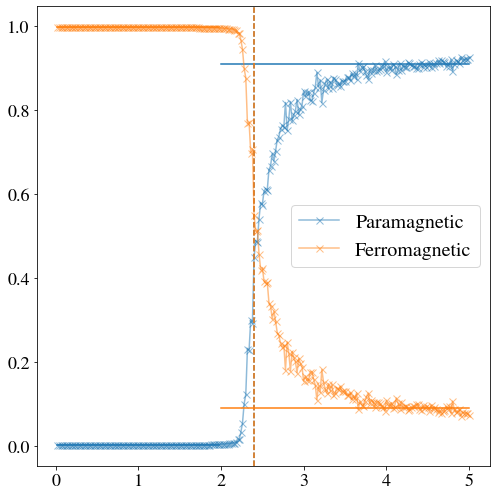

Prediction for 10 neurons in hidden layer
Lower bound (Paramagnetic): 3.986903611803427e-05
Higher bound (Paramagnetic): 0.9033141568593179
Half of height (Paramagnetic): 0.451677012947718
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.999960868358612
Higher bound (Ferromagnetic): 0.09668580603168775
Half of height (Ferromagnetic): 0.5483233371951499
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

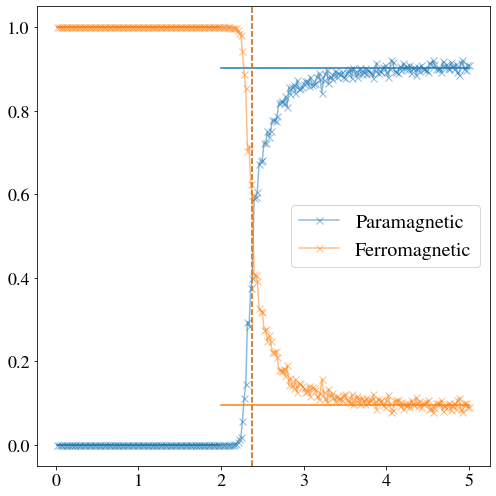

Prediction for 20 neurons in hidden layer
Lower bound (Paramagnetic): 7.921839505797743e-07
Higher bound (Paramagnetic): 0.9466393613346655
Half of height (Paramagnetic): 0.47332007675930804
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999980330467224
Higher bound (Ferromagnetic): 0.05336064611373381
Half of height (Ferromagnetic): 0.5266793395802281
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

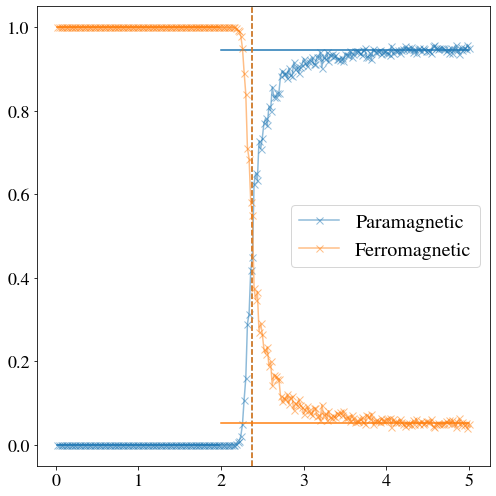

Prediction for 40 neurons in hidden layer
Lower bound (Paramagnetic): 1.2013553411620303e-12
Higher bound (Paramagnetic): 0.8519409579389235
Half of height (Paramagnetic): 0.42597047897006246
Critical temperature (Paramagnetic): 2.6
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.14805905082460658
Half of height (Ferromagnetic): 0.5740291975867571
Critical temperature (Ferromagnetic): 2.6


<Figure size 432x288 with 0 Axes>

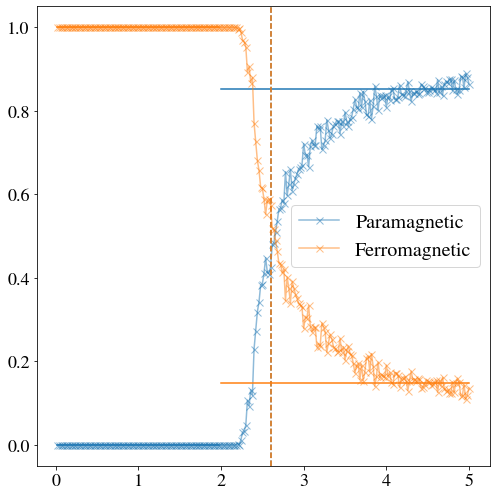

Prediction for 60 neurons in hidden layer
Lower bound (Paramagnetic): 1.90852734505143e-09
Higher bound (Paramagnetic): 0.9386494299943371
Half of height (Paramagnetic): 0.4693247159514322
Critical temperature (Paramagnetic): 2.42
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.06135057942627464
Half of height (Ferromagnetic): 0.5306749618875911
Critical temperature (Ferromagnetic): 2.42


<Figure size 432x288 with 0 Axes>

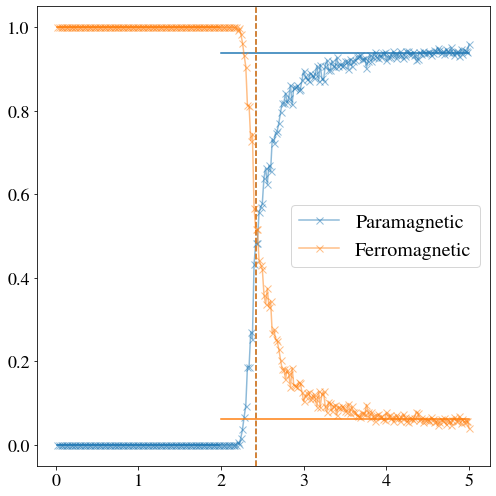

Prediction for 80 neurons in hidden layer
Lower bound (Paramagnetic): 2.9001545556184286e-07
Higher bound (Paramagnetic): 0.9669235851249721
Half of height (Paramagnetic): 0.48346193757021383
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999987483024596
Higher bound (Ferromagnetic): 0.03307637761994364
Half of height (Ferromagnetic): 0.5165375629612017
Critical temperature (Ferromagnetic): 2.4


<Figure size 432x288 with 0 Axes>

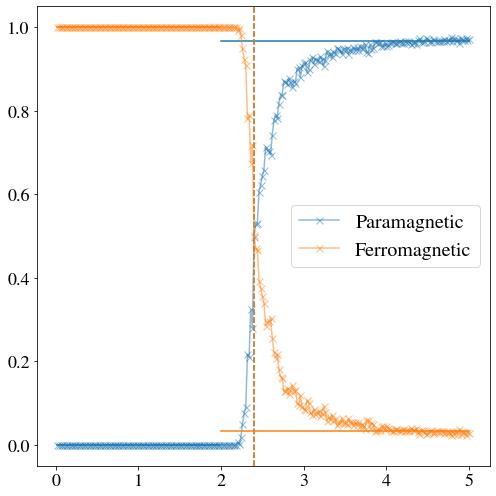

Prediction for 100 neurons in hidden layer
Lower bound (Paramagnetic): 2.8716182496282264e-05
Higher bound (Paramagnetic): 0.9933786438960656
Half of height (Paramagnetic): 0.49670368003928095
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999726569652556
Higher bound (Ferromagnetic): 0.006621359251829495
Half of height (Ferromagnetic): 0.5032970081085426
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

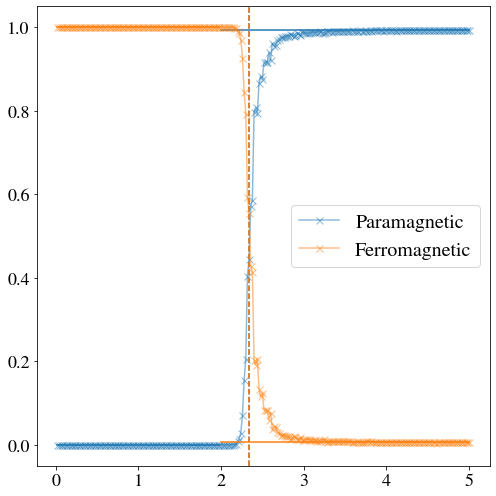

Prediction for 150 neurons in hidden layer
Lower bound (Paramagnetic): 1.9330836621520576e-05
Higher bound (Paramagnetic): 0.983713311307535
Half of height (Paramagnetic): 0.4918663210720783
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.999979704618454
Higher bound (Ferromagnetic): 0.016286679525293512
Half of height (Ferromagnetic): 0.5081331920718738
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

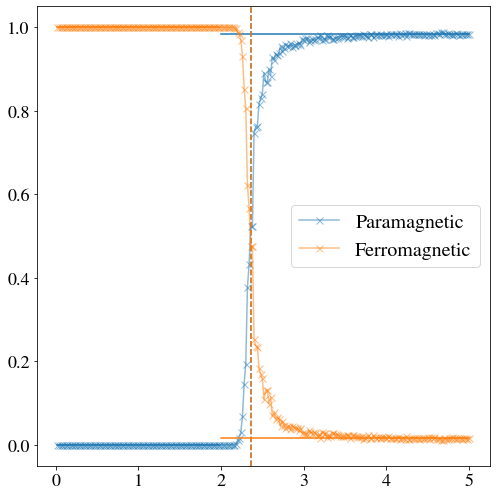

Prediction for 200 neurons in hidden layer
Lower bound (Paramagnetic): 9.279833957407379e-06
Higher bound (Paramagnetic): 0.9844552921313526
Half of height (Paramagnetic): 0.492232285982655
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9999918520450591
Higher bound (Ferromagnetic): 0.015544734475221067
Half of height (Ferromagnetic): 0.5077682932601401
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

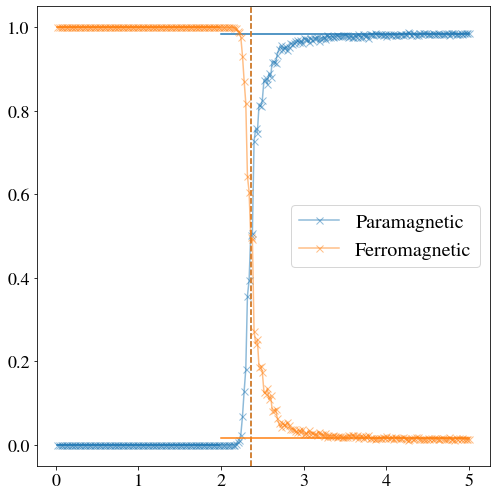

Prediction for 250 neurons in hidden layer
Lower bound (Paramagnetic): 0.000615663835778782
Higher bound (Paramagnetic): 0.9980861217367841
Half of height (Paramagnetic): 0.4993508927862815
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9993850708007799
Higher bound (Ferromagnetic): 0.0019138860197732699
Half of height (Ferromagnetic): 0.5006494784102766
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

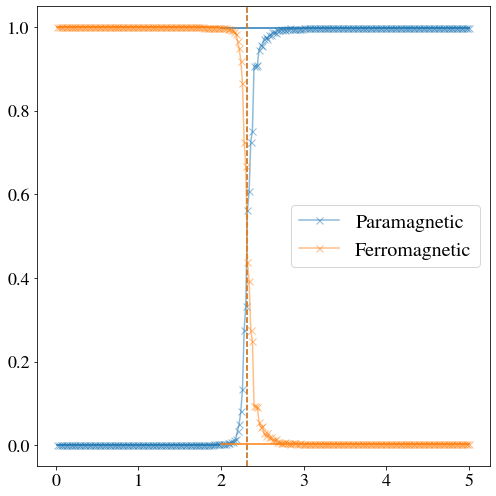

Prediction for 300 neurons in hidden layer
Lower bound (Paramagnetic): 0.00019347936176922
Higher bound (Paramagnetic): 0.9852670454511134
Half of height (Paramagnetic): 0.4927302624064413
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9998068356513973
Higher bound (Ferromagnetic): 0.014732913312854645
Half of height (Ferromagnetic): 0.507269874482126
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

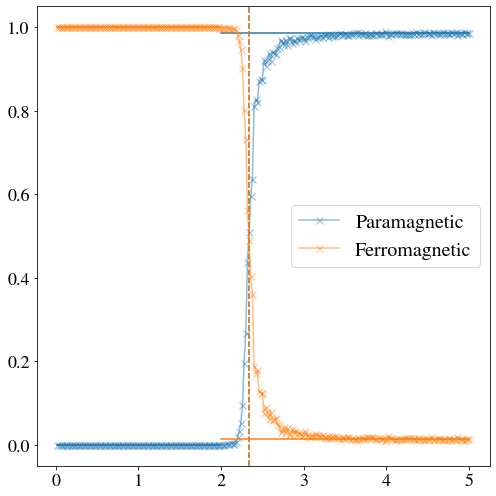

Prediction for 350 neurons in hidden layer
Lower bound (Paramagnetic): 1.1160464282511407e-06
Higher bound (Paramagnetic): 0.9971932394831788
Half of height (Paramagnetic): 0.49859717776480356
Critical temperature (Paramagnetic): 2.36
Lower bound (Ferromagnetic): 0.9999985671043397
Higher bound (Ferromagnetic): 0.002806777488456369
Half of height (Ferromagnetic): 0.501402672296398
Critical temperature (Ferromagnetic): 2.36


<Figure size 432x288 with 0 Axes>

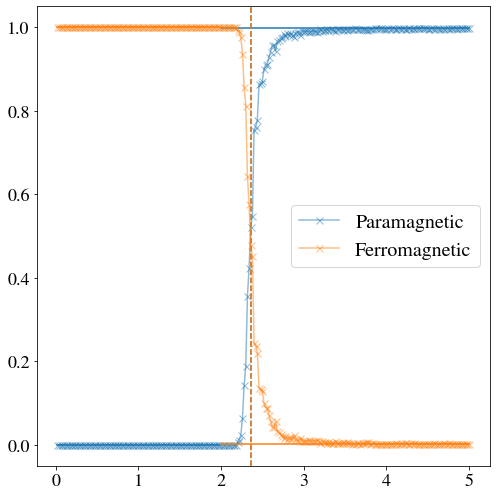

Prediction for 400 neurons in hidden layer
Lower bound (Paramagnetic): 0.002706794929690608
Higher bound (Paramagnetic): 0.9969280034887957
Half of height (Paramagnetic): 0.4998173992092432
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.997292149066925
Higher bound (Ferromagnetic): 0.003072012793472245
Half of height (Ferromagnetic): 0.5001820809301987
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

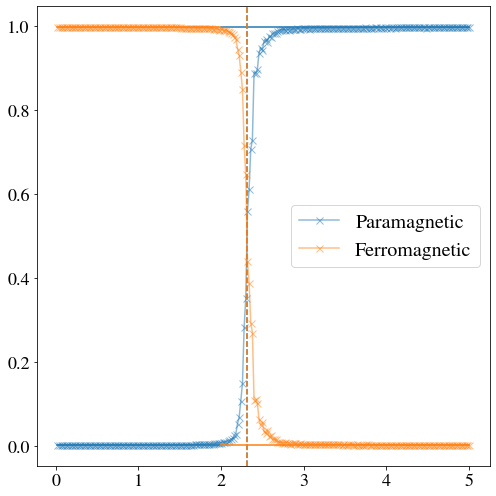

Prediction for 450 neurons in hidden layer
Lower bound (Paramagnetic): 8.285717782996477e-09
Higher bound (Paramagnetic): 0.9719231596179424
Half of height (Paramagnetic): 0.4859615839518301
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999993443489076
Higher bound (Ferromagnetic): 0.028076857381078568
Half of height (Ferromagnetic): 0.514038100864993
Critical temperature (Ferromagnetic): 2.4


<Figure size 432x288 with 0 Axes>

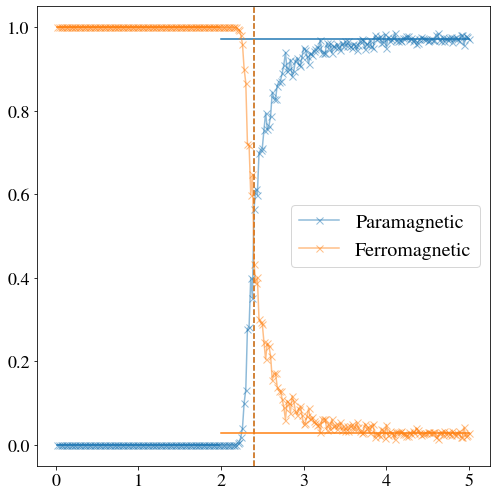

Prediction for 500 neurons in hidden layer
Lower bound (Paramagnetic): 1.9092351940344095e-05
Higher bound (Paramagnetic): 0.9881181004000645
Half of height (Paramagnetic): 0.4940685963760024
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999807512760163
Higher bound (Ferromagnetic): 0.011881948711350065
Half of height (Ferromagnetic): 0.5059313499936832
Critical temperature (Ferromagnetic): 2.38


<Figure size 432x288 with 0 Axes>

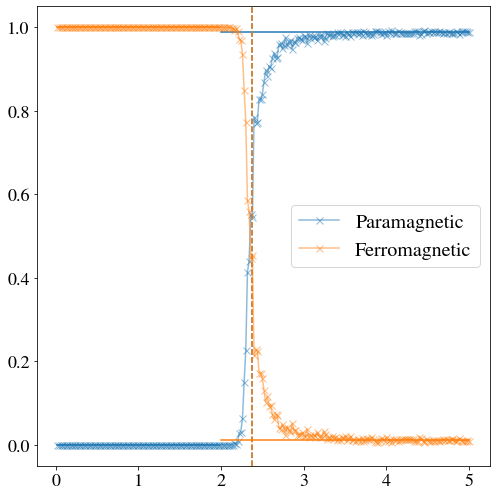

Prediction for 550 neurons in hidden layer
Lower bound (Paramagnetic): 0.000193126378871916
Higher bound (Paramagnetic): 0.998478293418881
Half of height (Paramagnetic): 0.49933570989887643
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998057675361629
Higher bound (Ferromagnetic): 0.0015217583471287765
Half of height (Ferromagnetic): 0.5006637629416458
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

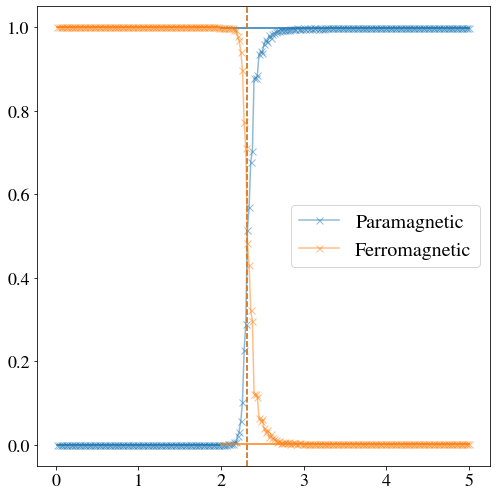

Prediction for 600 neurons in hidden layer
Lower bound (Paramagnetic): 0.001954102800227654
Higher bound (Paramagnetic): 0.998771898886734
Half of height (Paramagnetic): 0.5003630008434808
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.998045551776886
Higher bound (Ferromagnetic): 0.0012281342893473255
Half of height (Ferromagnetic): 0.4996368430331167
Critical temperature (Ferromagnetic): 2.3000000000000003


<Figure size 432x288 with 0 Axes>

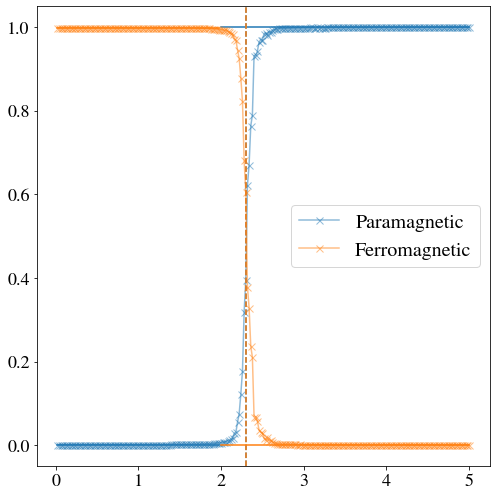

Prediction for 650 neurons in hidden layer
Lower bound (Paramagnetic): 0.000874845059588502
Higher bound (Paramagnetic): 0.9977757393145045
Half of height (Paramagnetic): 0.49932529218704647
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9991256487369519
Higher bound (Ferromagnetic): 0.002224287792105706
Half of height (Ferromagnetic): 0.5006749682645288
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

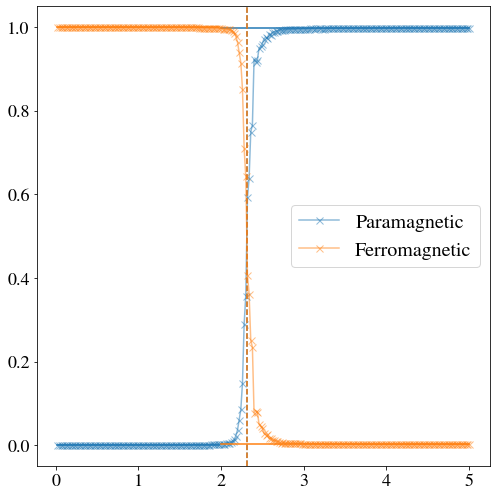

Prediction for 700 neurons in hidden layer
Lower bound (Paramagnetic): 0.000363066290738012
Higher bound (Paramagnetic): 0.9988852143287634
Half of height (Paramagnetic): 0.4996241403097507
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9996387696266167
Higher bound (Ferromagnetic): 0.0011148100157322568
Half of height (Ferromagnetic): 0.5003767898211745
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

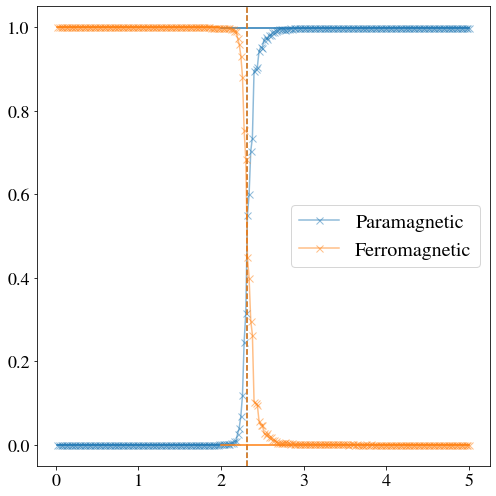

Prediction for 750 neurons in hidden layer
Lower bound (Paramagnetic): 5.162672925507651e-05
Higher bound (Paramagnetic): 0.9964253551819667
Half of height (Paramagnetic): 0.4982384909556109
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999485659599303
Higher bound (Ferromagnetic): 0.0035746225508511698
Half of height (Ferromagnetic): 0.5017615942553908
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

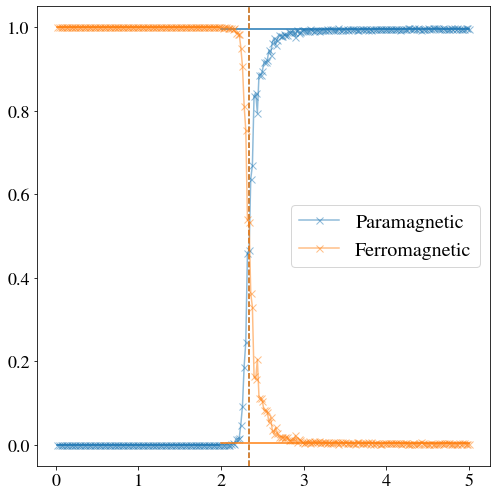

Prediction for 800 neurons in hidden layer
Lower bound (Paramagnetic): 0.000269146394566588
Higher bound (Paramagnetic): 0.9981840054194132
Half of height (Paramagnetic): 0.4992265759069899
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9997316932678223
Higher bound (Ferromagnetic): 0.001815978693319251
Half of height (Ferromagnetic): 0.5007738359805708
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

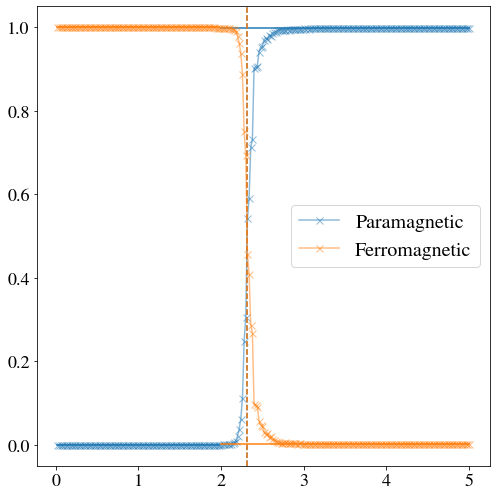

Prediction for 850 neurons in hidden layer
Lower bound (Paramagnetic): 0.000128269634151312
Higher bound (Paramagnetic): 0.9994961245387197
Half of height (Paramagnetic): 0.49981219708643554
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998715221881863
Higher bound (Ferromagnetic): 0.0005038812546533784
Half of height (Ferromagnetic): 0.5001877017214198
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

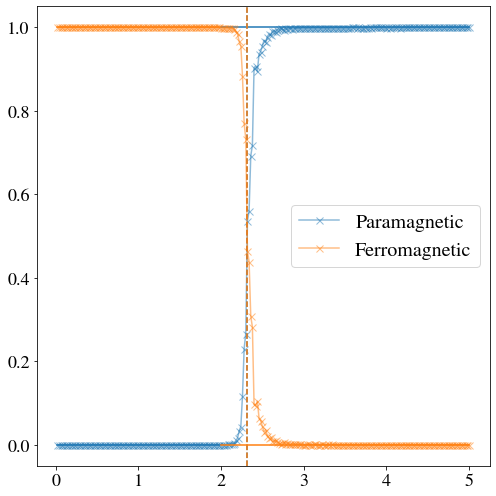

Prediction for 900 neurons in hidden layer
Lower bound (Paramagnetic): 0.000131600169988762
Higher bound (Paramagnetic): 0.9970911507512945
Half of height (Paramagnetic): 0.49861137546064166
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9998679316043854
Higher bound (Ferromagnetic): 0.002908794257296749
Half of height (Ferromagnetic): 0.5013883629308411
Critical temperature (Ferromagnetic): 2.32


<Figure size 432x288 with 0 Axes>

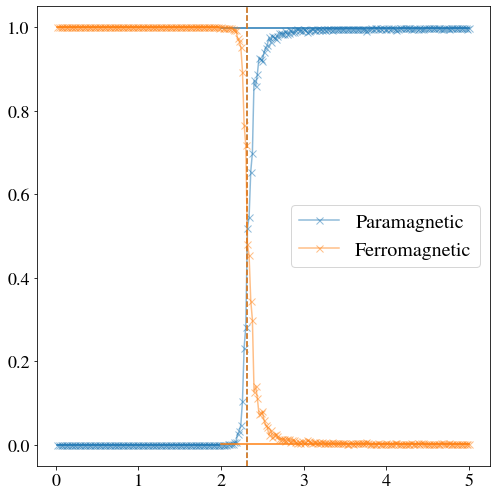

Prediction for 950 neurons in hidden layer
Lower bound (Paramagnetic): 0.00052834185422393
Higher bound (Paramagnetic): 0.9995265486193639
Half of height (Paramagnetic): 0.5000274452367939
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9994723629951465
Higher bound (Ferromagnetic): 0.00047344505768629413
Half of height (Ferromagnetic): 0.4999729040264164
Critical temperature (Ferromagnetic): 2.3000000000000003


<Figure size 432x288 with 0 Axes>

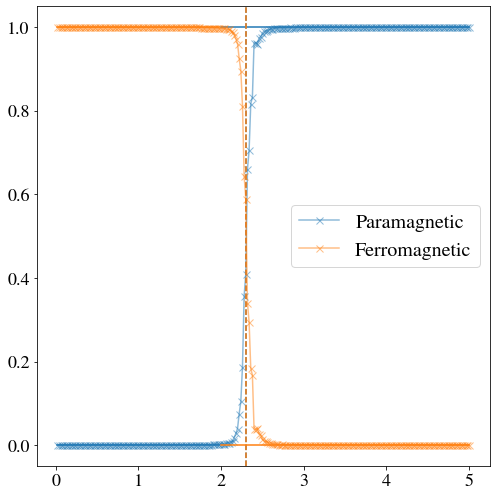

Prediction for 1000 neurons in hidden layer
Lower bound (Paramagnetic): 3.8309992742142644e-05
Higher bound (Paramagnetic): 0.9896876169186012
Half of height (Paramagnetic): 0.49486296345567166
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999607598781585
Higher bound (Ferromagnetic): 0.010312338727284875
Half of height (Ferromagnetic): 0.5051365493027217
Critical temperature (Ferromagnetic): 2.34


<Figure size 432x288 with 0 Axes>

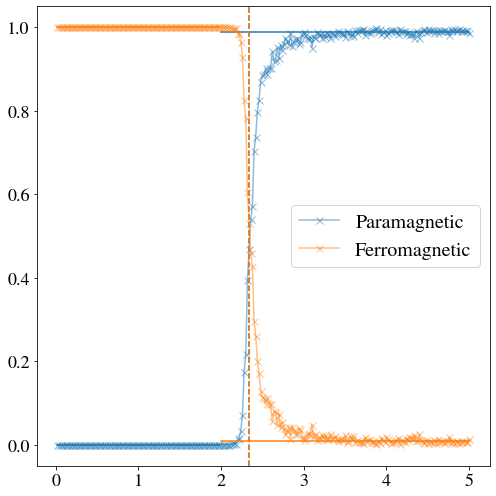

<Figure size 432x288 with 0 Axes>

In [27]:
critical_temperature = []

for neuron in neurons:
	prediction = pd.read_csv(resultsfolder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
	print(f'Prediction for {neuron} neurons in hidden layer')

	temperature, para, ferro = prediction[1:].T

	index_temp_1 = np.where(temperature == 1)[0][0]

	index_temp_3 = np.where(temperature == 4)[0][0]
	
	plt.figure(figsize=(7, 7))

	tc = []

	for index, feature in enumerate([para, ferro]):
		color = colors[index]
		
		plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

		popt_first, pcov_first = curve_fit(constant_func, temperature[:index_temp_1+1], feature[:index_temp_1+1])
		popt_last, pcov_last = curve_fit(constant_func, temperature[index_temp_3:], feature[index_temp_3:])

		plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
			constant_func(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

		plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
			constant_func(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
		
		print(f'Lower bound ({names[index]}): {popt_first[0]}')
		print(f'Higher bound ({names[index]}): {popt_last[0]}')
		
		half_of_height = (popt_first[0]+popt_last[0])/2
		
		closest_index = np.abs(feature - half_of_height *np.ones_like(feature)).argmin()

		closest_x = temperature[closest_index]

		plt.axvline(x=closest_x, color = color, linestyle = '--')
		
		print(f'Half of height ({names[index]}): {half_of_height}')
		print(f'Critical temperature ({names[index]}): {closest_x}')
		tc.append(closest_x)
		
	plt.legend()
	plt.show()
	plt.savefig(saving_folder+f'/(para-ferro)_critical_temperature_{neuron}.pdf')

	mean_temperature = np.mean(tc)

	critical_temperature.append(mean_temperature)

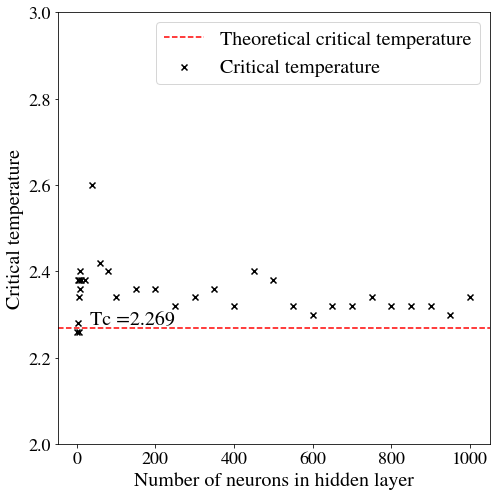

In [28]:
plt.figure(figsize=(7, 7))


plt.scatter(neurons[1:], critical_temperature[1:], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Critical temperature')

plt.text(250, 2.269, rf'Tc ={2.269}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)

plt.ylim((2, 3))
plt.legend()
plt.savefig(os.path.join(saving_folder, '(para-ferro)_critical_temperature.pdf'))
plt.show()